In [1]:
import pandas as pd
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy
from scikits import bootstrap as boot
sns.set(font_scale=1.0)

In [2]:
def processing(df):

    df['$c2_{b,seg}$'] = df['$F2_{b,seg}$']/df['$V_{b,seg}$']
    df['$c2_{b,ell}$'] = df['$F2_{b,zproj}$']/df['$V_{b,ell}$']
    df['$c2_{s,seg}$'] = df['$F2_{s,seg}$']/df['$V_{s,seg}$']
    df['$c2_{s,ell}$'] = df['$F2_{s,zproj}$']/df['$V_{s,ell}$']

    df['$c1_{b,seg}$'] = df['$F1_{b,seg}$']/df['$V_{b,seg}$']
    df['$c1_{b,ell}$'] = df['$F1_{b,zproj}$']/df['$V_{b,ell}$']
    df['$c1_{s,seg}$'] = df['$F1_{s,seg}$']/df['$V_{s,seg}$']
    df['$c1_{s,ell}$'] = df['$F1_{s,zproj}$']/df['$V_{s,ell}$']

    df['$F2_{k,b,seg}$'] = (df['$F2_{s,seg}$']-df['$F2_{b,seg}$'])/df['$t_{G1}$']
    df['$F1_{k,b,seg}$'] = (df['$F1_{s,seg}$']-df['$F1_{b,seg}$'])/df['$t_{G1}$']
    df['$F2_{k,b,zproj}$'] = (df['$F2_{s,zproj}$']-df['$F2_{b,zproj}$'])/df['$t_{G1}$']
    df['$F1_{k,b,zproj}$'] = (df['$F1_{s,zproj}$']-df['$F1_{b,zproj}$'])/df['$t_{G1}$']

    df['$V_{div,seg}$'] = df['$V_{d,seg}$']+df['$V_{bud,seg}$']
    df['$\Delta V_{budded}$'] = df['$V_{div,seg}$']-df['$V_{s,seg}$']
    df['$F1_{div,seg}$'] = df['$F1_{d,seg}$']+df['$F1_{bud,seg}$']
    df['$F2_{div,seg}$'] = df['$F2_{d,seg}$']+df['$F2_{bud,seg}$']
    df['$c1_{div,seg}$'] = df['$F1_{div,seg}$']/df['$V_{div,seg}$']
    df['$c2_{div,seg}$'] = df['$F2_{div,seg}$']/df['$V_{div,seg}$']
    df['$c1_{b,zproj}$'] = df['$F1_{b,zproj}$']/df['$V_{b,seg}$']
    df['$c2_{b,zproj}$'] = df['$F2_{b,zproj}$']/df['$V_{b,seg}$']
    df['$F1_{div,zproj}$'] = df['$F1_{d,zproj}$']+df['$F1_{bud,zproj}$']
    df['$F2_{div,zproj}$'] = df['$F2_{d,zproj}$']+df['$F2_{bud,zproj}$']
    df['$c1_{div,zproj}$'] = df['$F1_{div,zproj}$']/df['$V_{div,seg}$']
    df['$c2_{div,zproj}$'] = df['$F2_{div,zproj}$']/df['$V_{div,seg}$']
    df['$V_{div,ell}$'] = df['$V_{d,ell}$']+df['$V_{bud,ell}$']
    df['$c1_{div,ell}$'] = df['$F1_{div,zproj}$']/df['$V_{div,ell}$']
    df['$c2_{div,ell}$'] = df['$F2_{div,zproj}$']/df['$V_{div,ell}$']
    df['$c1_{div,ellseg}$'] = df['$F1_{div,seg}$']/df['$V_{div,ell}$']
    df['$c2_{div,ellseg}$'] = df['$F2_{div,seg}$']/df['$V_{div,ell}$']
    df['$t_{div}$']=df['$t_{G1}$']+df['$t_{budded}$']
    
    df['$c2_{b,seg,norm}$'] = df['$c2_{b,seg}$']/np.mean(df['$c2_{b,seg}$'])
    return df

In [3]:
# pACT1-mKate2 experiment on 180910
# expt_id = '/180910_yFB71'
# pACT1-mCherry experiment on 181114
expt_id0 = '/181114_yFB78_Raff_125Gal'
df0 = pd.read_pickle("./expt_ids"+expt_id0+".pkl")
df0['expt'] = expt_id0
df0['label'] = 'pGAL1-WHI5 11/14'

# # yFB79 Raffinose experiment on 181207
expt_id1 = '/181207_yFB79_60X_Raff_125uMGal'
df1 = pd.read_pickle("./expt_ids"+expt_id1+".pkl")
df1['expt'] = expt_id1
df1['label'] = 'pWHI5-WHI5 12/07'
# yFB79 Raffinose experiment on 190417
expt_id2 = '/181917_yFB79_60X_Raff_125uMGal'
df2= pd.read_pickle("./expt_ids"+expt_id2+".pkl")
df2['expt'] = '/190417_yFB79_60X_Raff_125uMGal'
df2['label'] = 'pWHI5-WHI5 4/17'

# # yFB77 Raffinose experiment on 181220
# expt_id1 = '/181220_yFB77_60X_Raff_125uMGal'
# df1= pd.read_pickle("./expt_ids"+expt_id1+".pkl")
# df1['expt'] = '/181220_yFB77_60X_Raff_125uMGal'
# df1['label'] = 'pGAL1-WHI5 12/20'
# print df.describe()
df0=processing(df0)
df1=processing(df1)
df=df0.append(df1);
df2=processing(df2)
df=df.append(df2);

/home/felix/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [217]:
df.head()

,"$F1_{b,nuc,int}$","$F1_{b,seg}$","$F1_{b,zproj}$","$F1_{bud,seg}$","$F1_{bud,zproj}$","$F1_{d,seg}$","$F1_{d,zproj}$","$F1_{s,seg}$","$F1_{s,zproj}$","$F2_{b,seg}$",...,"$F1_{div,zproj}$","$F2_{div,zproj}$","$c1_{div,zproj}$","$c2_{div,zproj}$","$V_{div,ell}$","$c1_{div,ell}$","$c2_{div,ell}$","$c1_{div,ellseg}$","$c2_{div,ellseg}$",$t_{div}$
0,36249.928571,115775.357143,141933.0,70688.0,65585.142857,106860.642857,116305.0,126016.928571,151473.0,208808.642857,...,181890.142857,5.567075e+05,1141.178785,3492.782944,80.681391,2254.424974,6900.073151,2200.614548,6639.298732,320.0
1,41406.285714,106860.642857,116305.0,91985.0,77486.928571,133791.000000,165542.0,118241.571429,137865.0,349230.857143,...,243028.928571,6.909404e+05,1196.877546,3402.767746,107.595836,2258.720580,6421.627306,2098.371172,6005.169341,140.0
2,72473.785714,290286.857143,348981.0,126554.0,107846.285714,219706.500000,264737.0,174914.428571,211779.0,720296.714286,...,372583.285714,9.943346e+05,1462.824212,3903.923890,123.351644,3020.497120,8060.976003,2807.100810,7679.679910,130.0
3,52485.642857,175501.071429,190789.0,84652.0,75953.571429,146175.428571,162847.0,254723.285714,310324.0,539455.285714,...,238800.571429,7.774896e+05,1123.588172,3658.190939,135.296494,1765.016699,5746.561109,1706.085808,5421.648245,130.0
4,54206.928571,144617.785714,152771.0,129512.0,112438.357143,255667.000000,295574.0,218011.714286,256717.0,548023.857143,...,408012.357143,1.125363e+06,1601.924664,4418.364788,100.152311,4073.918540,11236.519815,3845.932217,10855.090061,170.0


In [218]:
df.columns

Index([u'$F1_{b,nuc,int}$', u'$F1_{b,seg}$', u'$F1_{b,zproj}$',
       u'$F1_{bud,seg}$', u'$F1_{bud,zproj}$', u'$F1_{d,seg}$',
       u'$F1_{d,zproj}$', u'$F1_{s,seg}$', u'$F1_{s,zproj}$', u'$F2_{b,seg}$',
       u'$F2_{b,zproj}$', u'$F2_{bud,seg}$', u'$F2_{bud,zproj}$',
       u'$F2_{d,seg}$', u'$F2_{d,zproj}$', u'$F2_{s,seg}$', u'$F2_{s,zproj}$',
       u'$V_{b,ell}$', u'$V_{b,seg}$', u'$V_{bud,ell}$', u'$V_{bud,seg}$',
       u'$V_{d,ell}$', u'$V_{d,seg}$', u'$V_{s,ell}$', u'$V_{s,seg}$',
       u'$t_{G1}$', u'$t_{budded}$', u'expt', u'label', u'type',
       u'$c2_{b,seg}$', u'$c2_{b,ell}$', u'$c2_{s,seg}$', u'$c2_{s,ell}$',
       u'$c1_{b,seg}$', u'$c1_{b,ell}$', u'$c1_{s,seg}$', u'$c1_{s,ell}$',
       u'$F2_{k,b,seg}$', u'$F1_{k,b,seg}$', u'$F2_{k,b,zproj}$',
       u'$F1_{k,b,zproj}$', u'$V_{div,seg}$', u'$\Delta V_{budded}$',
       u'$F1_{div,seg}$', u'$F2_{div,seg}$', u'$c1_{div,seg}$',
       u'$c2_{div,seg}$', u'$c1_{b,zproj}$', u'$c2_{b,zproj}$',
       u'$F1_{div,zproj

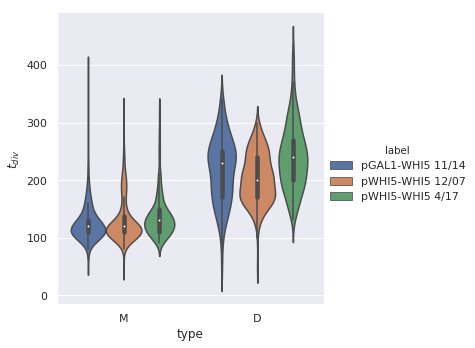

In [6]:
sns.set(font_scale=1.0)
sns_plot=sns.catplot(x="type", y="$t_{div}$", hue="label", kind="violin", data=df,figsize=[5,10])
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c1s_dist.png')
# fig.savefig()

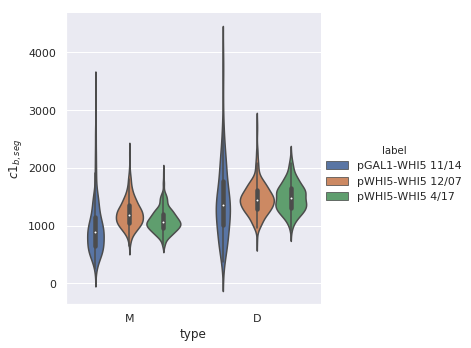

In [7]:
sns.set(font_scale=1.0)
sns_plot=sns.catplot(x="type", y="$c1_{b,seg}$", hue="label", kind="violin", data=df)
plt.show()

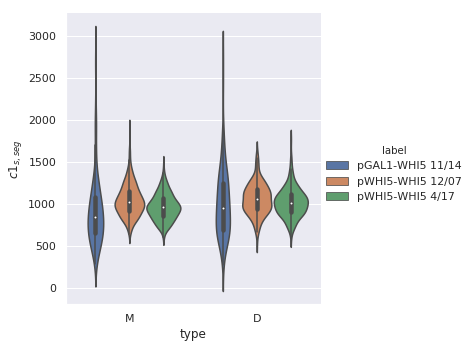

In [8]:
sns_plot=sns.catplot(x="type", y="$c1_{s,seg}$", hue="label", kind="violin", data=df)
# plt.ylim(ymax=4500)
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c1s_dist.png')
# fig.savefig()

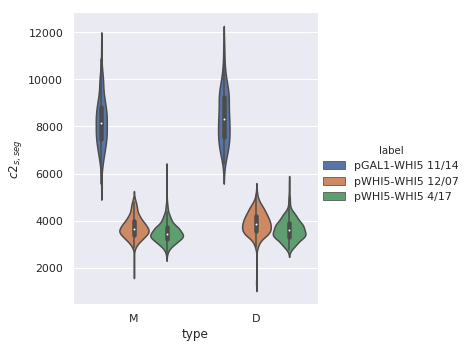

In [9]:
sns_plot=sns.catplot(x="type", y="$c2_{s,seg}$", hue="label", kind="violin", data=df)
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c2s_dist.png')
# fig.savefig()

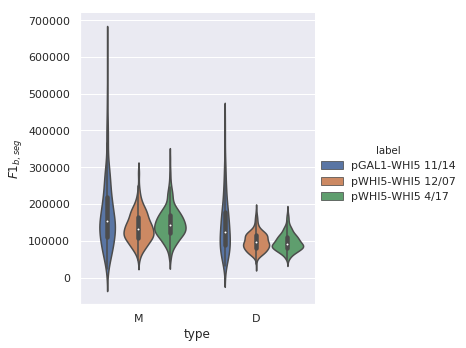

In [10]:
sns_plot=sns.catplot(x="type", y="$F1_{b,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/F1b_dist.png')
# fig.savefig()

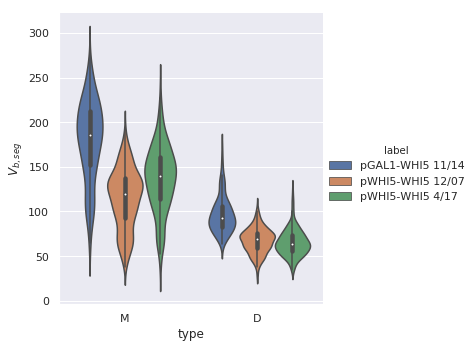

In [11]:
sns_plot=sns.catplot(x="type", y="$V_{b,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vb_dist.png')

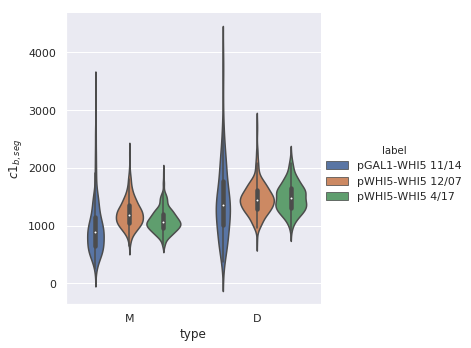

In [12]:
sns_plot=sns.catplot(x="type", y="$c1_{b,seg}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c1b_dist.png')

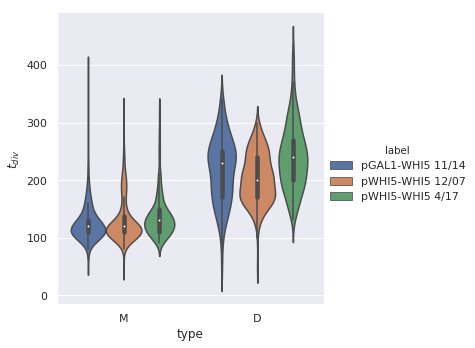

In [13]:

sns_plot=sns.catplot(x="type", y="$t_{div}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/t_div_dist.png')

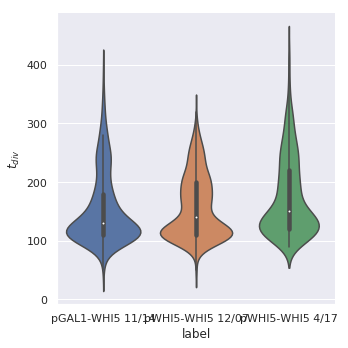

In [19]:
sns_plot=sns.catplot(x="label", y="$t_{div}$", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/t_div_dist_fullpop.png')

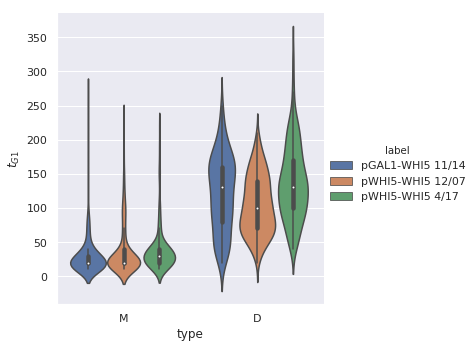

In [14]:
sns_plot=sns.catplot(x="type", y="$t_{G1}$", hue="label", kind="violin", data=df)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tG1_dist.png')

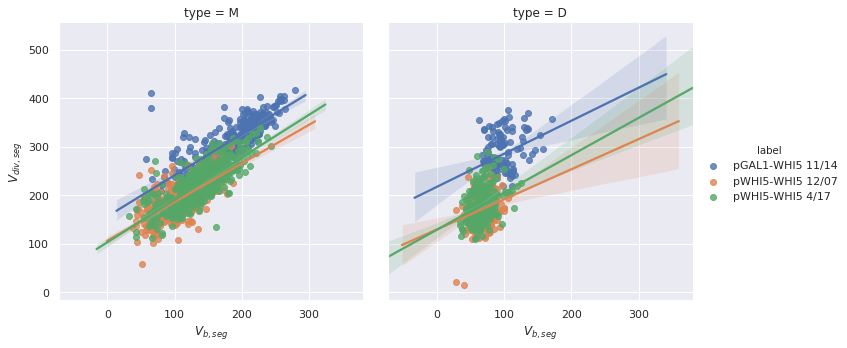

In [15]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$V_{div,seg}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/Vdiv_Vb.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [21]:
x=df.type=='D'
y=df.label=='pGAL1-WHI5 11/14'
vals = []
print len(df[x&y])
for i0 in range(2000):
    temp = df[x & y].sample(frac=1.0, replace=True)
#     print len(temp)
    vals.append(np.mean(temp['$V_{b,seg}$']))
print np.mean(vals), np.sort(vals)[100], np.sort(vals)[1900]

125
96.74660142786243 93.65144680080006 99.75389926320005


In [19]:
boot.ci(df[x&y]['$V_{b,seg}$'], np.mean, alpha=0.05)

array([ 93.50692974, 100.65573363])

In [25]:
x=df.type=='D'
y=df.label=='pGAL1-WHI5 11/14'
vals = []
print len(df[x&y])
for i0 in range(1000):
    temp = df[x & y].sample(frac=1.0, replace=True)
#     print len(temp)
    vals.append(scipy.stats.linregress(temp['$V_{b,seg}$'], temp['$V_{div,seg}$'])[0])
print np.mean(vals), np.sort(vals)[50], np.sort(vals)[950]

125
0.6834535124361737 0.3963548723281595 0.9587774833643062


0.6824411259547853 0.39564073783436254 0.977613412070835


In [62]:
x=df.type=='D'
y=df.label=='pGAL1-WHI5 11/14'
print scipy.stats.pearsonr(df['$V_{b,seg}$'],df['$V_{div,seg}$'])
z = boot.ci((df[x & y]['$V_{b,seg}$'], df[x & y]['$V_{div,seg}$']), scipy.stats.pearsonr)
print z[0]
print z[1]

(0.7652183098277329, 3.0511922614330027e-212)
[1.46216597e-01 9.44571776e-08]
[0.44350483 0.08019003]


In [26]:
types = ['D','M']
labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
x=df.type=='D'
y=df.label=='pGAL1-WHI5 11/14'
print scipy.stats.linregress(df[x&y][['$V_{b,seg}$','$V_{div,seg}$']])[:]
z = boot.ci(df[x & y][['$V_{b,seg}$','$V_{div,seg}$']], scipy.stats.linregress)
print z[0]
print z[1]

(0.6805523156395833, 217.22636727427425, 0.30226242530073677, 0.0006126643890417083, 0.19351743910388644)
[3.25243028e-01 1.79831794e+02 1.49457219e-01 1.37016341e-07
 1.57062825e-01]
[1.03520289e+00 2.53369148e+02 4.41453230e-01 7.46161033e-02
 2.33381386e-01]


In [ ]:
scipy.stats.

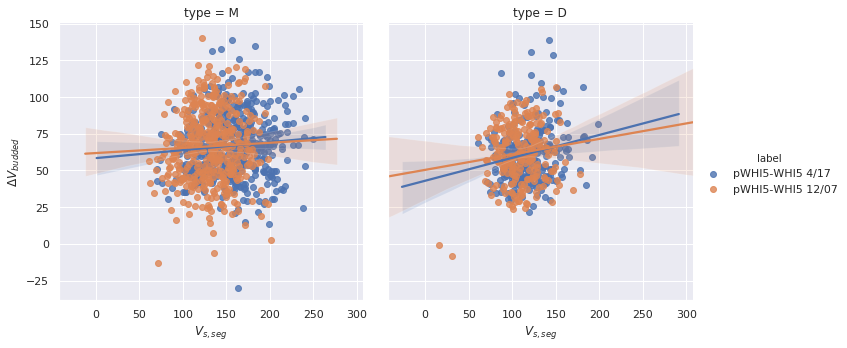

In [229]:
sns_plot=sns.lmplot(x='$V_{s,seg}$',y='$\Delta V_{budded}$', data=df,hue='label', col="type",ci=99)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/dvg2_Vs.png')
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [35]:
types = ['D','M']
labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
x, y = '$V_{b,seg}$', '$V_{div,seg}$'
for ind in range(len(labels)):
    for ind1 in range(len(types)):
        print labels[ind], types[ind1]
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci(df[v1 & v2][[x,y]], scipy.stats.linregress)
        print z[0][0], z[1][0]
        print scipy.stats.linregress(df[v1&v2][[x,y]])[0]

pGAL1-WHI5 11/14 D
0.3155298047657295 1.026723834908505
0.6805523156395833
pGAL1-WHI5 11/14 M
0.6949648716448362 0.9442579981234523
0.8477641981825336
pWHI5-WHI5 12/07 D
0.32662352075335044 1.046533560448615
0.6200790190679538
pWHI5-WHI5 12/07 M
0.7143257354637194 0.8805408566852773
0.7960498390015036


In [231]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$V_{div,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci(df[v1 & v2][[x,y]], scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([z[0][0]-vals[0][-1], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $V_{div,seg}$
pWHI5-WHI5 4/17 D
0.5319507866027351 1.0239644649532527
pWHI5-WHI5 12/07 D
0.32512460215919936 1.0472653337612776
pWHI5-WHI5 4/17 M
0.8079315351285629 0.9408692930017581
pWHI5-WHI5 12/07 M
0.7120439993855673 0.8768663964161554
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


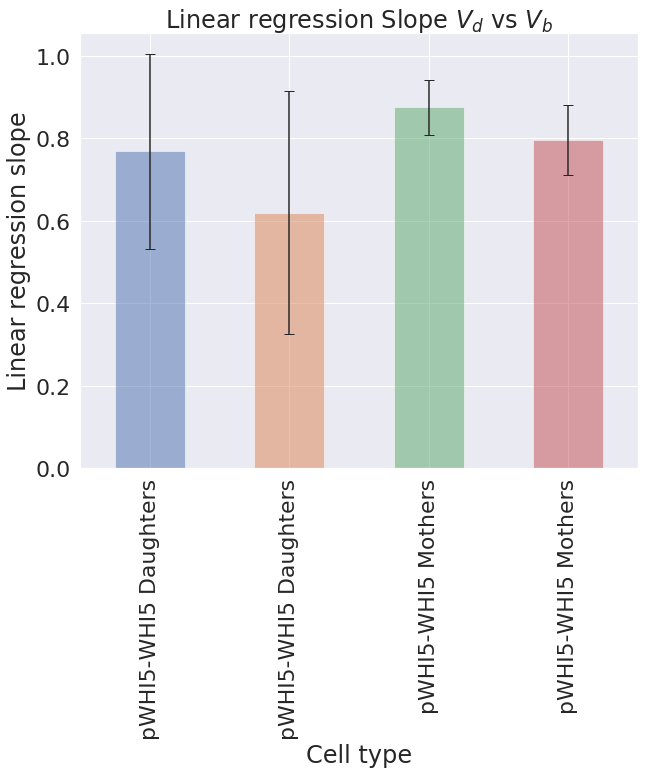

In [232]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression Slope $V_d$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Linear regression slope')
fig=plot.get_figure()
fig.savefig('./plots/Vd_Vb_slope_comp_pWHI5.png',bbox_inches='tight')

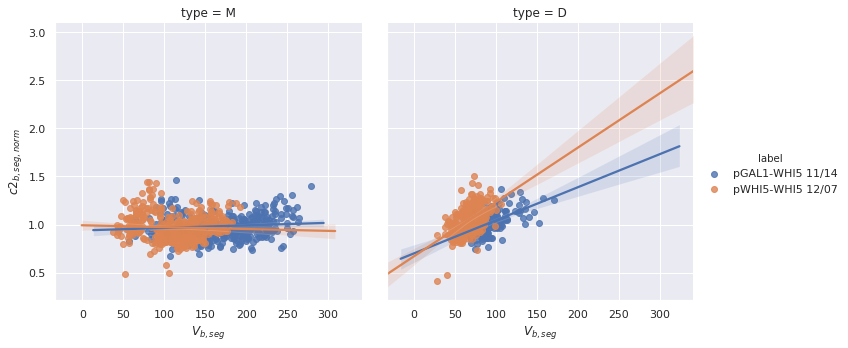

In [6]:
sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg,norm}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c2b_Vb_norm.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [269]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
# labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c2_{b,seg,norm}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]/np.mean(df[v1&v2][y])), scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df[v1&v2][x], df[v1&v2][y]/np.mean(df[v1&v2][y]))[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg,norm}$
pGAL1-WHI5 11/14 D
0.0023978733118902073 0.004210222515808703
pWHI5-WHI5 12/07 D
0.004315718600079115 0.0068376892047604
pGAL1-WHI5 11/14 M
-8.878935254470048e-05 0.0006368316822526545
pWHI5-WHI5 12/07 M
-0.0006152796832347646 0.00023076428047615996
['pGAL1-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pGAL1-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


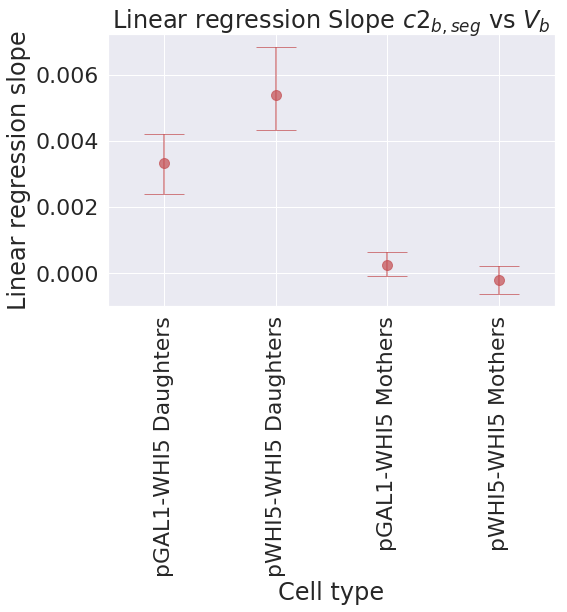

In [270]:
sns.set(font_scale=2.0)
plt.figure(figsize=(8,5))
plot = plt.errorbar(x=temp1.label,y=temp1.slope,yerr=zip(*vals[1]), fmt='.', markersize=20, capsize=20,color='r',alpha=0.7)
plt.title('Linear regression Slope $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.xlim(xmin=-0.5, xmax=3.5)
plt.ylabel('Linear regression slope')
# fig=plot.get_figure()
plt.setp(plt.gca().get_xticklabels(), rotation='vertical')
fig.savefig('./plots/c2_Vb_slope_comp_v1_norm.png',bbox_inches='tight')

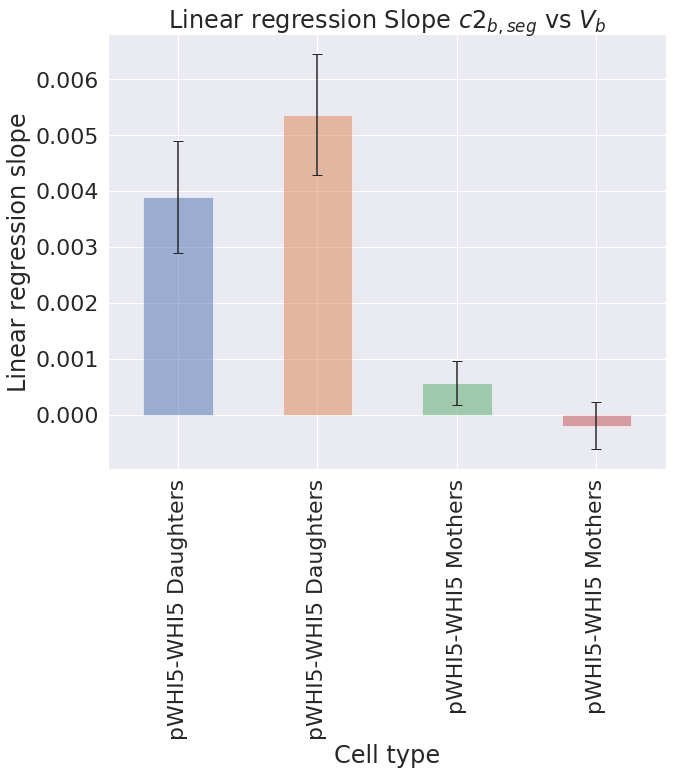

In [235]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression Slope $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Linear regression slope')
fig=plot.get_figure()
fig.savefig('./plots/c2_Vb_slope_comp_pWHI5.png',bbox_inches='tight')

In [236]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg}$
pWHI5-WHI5 4/17 D
0.3696242076022135 0.5839211372406496
pWHI5-WHI5 12/07 D
0.43799739829371154 0.618867109619498
pWHI5-WHI5 4/17 M
0.04960988805544387 0.2979839887487343
pWHI5-WHI5 12/07 M
-0.14247935860996191 0.05781579530006004
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


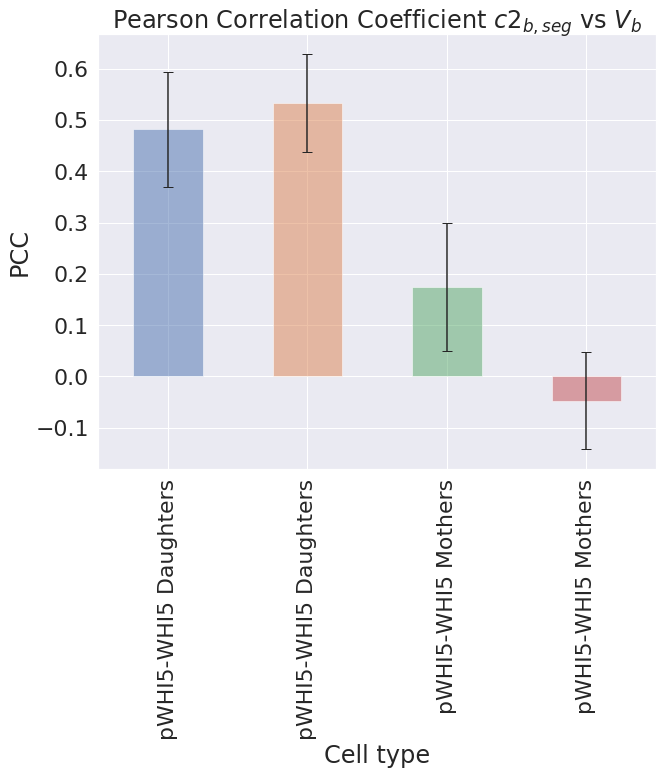

In [237]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/c2_Vb_pcc_comp_pWHI5.png',bbox_inches='tight')

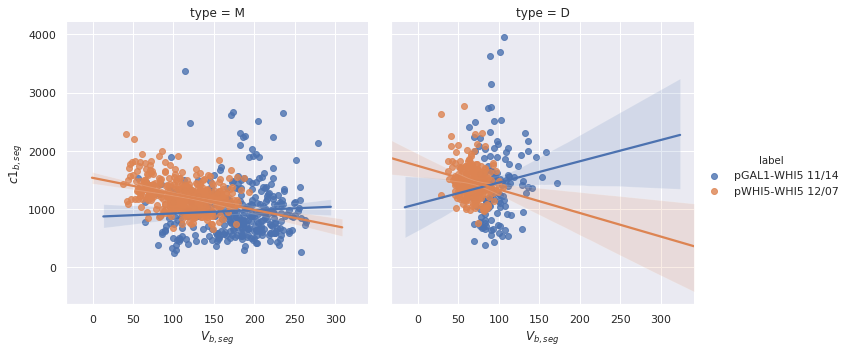

In [5]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/c1b_Vb.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

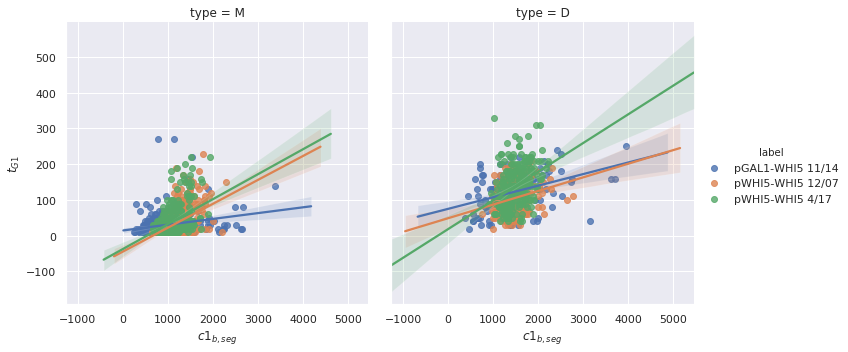

In [9]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$c1_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c1b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

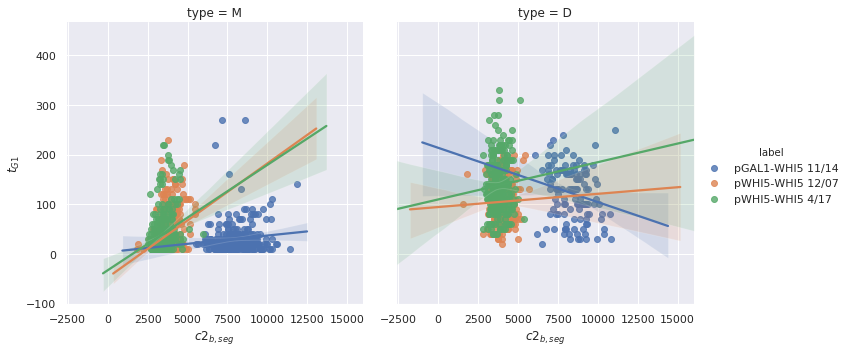

In [10]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$c2_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_c2b.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [14]:
np.random.randint(1,5,size=1)

array([3])

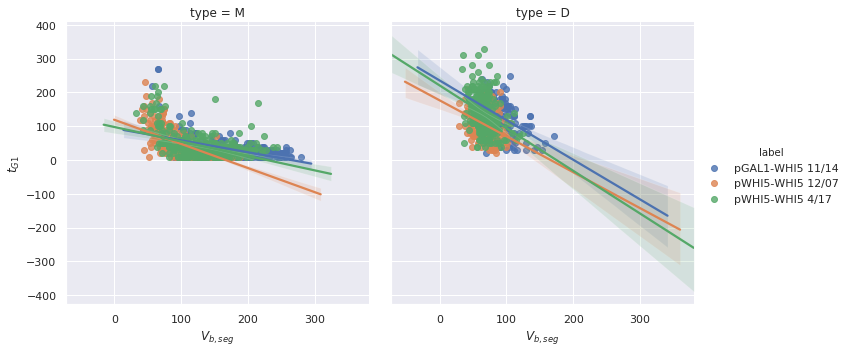

In [11]:
# sns.set(font_scale=1.0)
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type",ci=95)
# plt.title('Daughters')
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/plots_other_expts/tg1_vb.png', dpi=500)
# sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df[df['type']=='M'],hue='label')
# plt.title('Mothers')
# plt.show()

In [239]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c1_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c1_{b,seg}$
pWHI5-WHI5 4/17 D
-0.3541496859305546 -0.13625536262487714
pWHI5-WHI5 12/07 D
-0.341787873626121 -0.07445279437399713
pWHI5-WHI5 4/17 M
-0.4466648194373551 -0.26165971274543987
pWHI5-WHI5 12/07 M
-0.45363016402757217 -0.2777464798042927
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


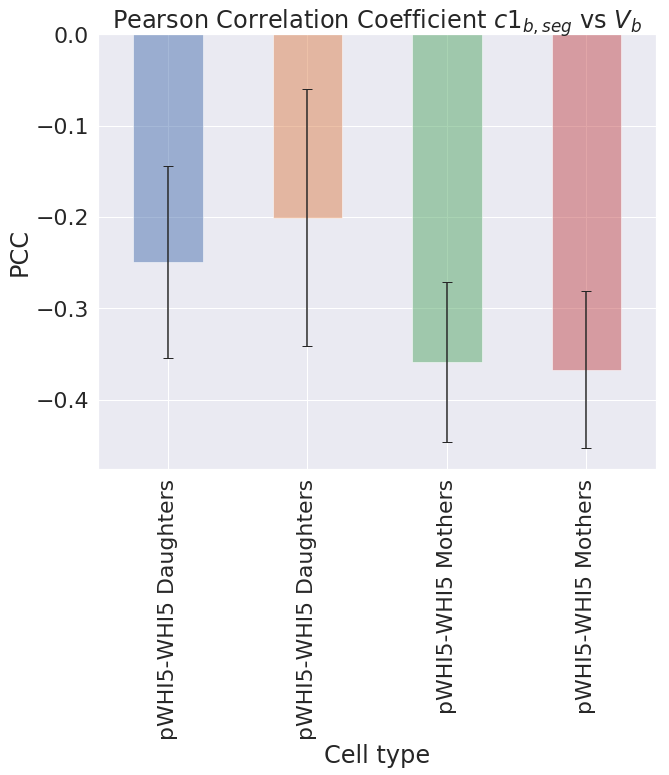

In [240]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Pearson Correlation Coefficient $c1_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('PCC')
fig=plot.get_figure()
fig.savefig('./plots/c1_Vb_pcc_comp_pWHI5.png',bbox_inches='tight')

In [241]:
types = ['D','M']
full_types = ['Daughters', 'Mothers']
labels = ['pWHI5-WHI5 4/17', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c1_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(labels[ind][:10]+' '+full_types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]/np.mean(df[v1&v2][y])), scipy.stats.linregress)
        vals[0].append(scipy.stats.linregress(df[v1&v2][x], df[v1&v2][y]/np.mean(df[v1&v2][y]))[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c1_{b,seg}$
pWHI5-WHI5 4/17 D
-0.004105344445212189 -0.0015859628582441236
pWHI5-WHI5 12/07 D
-0.004988815571020287 -0.000979750088202371
pWHI5-WHI5 4/17 M
-0.002347968008330713 -0.0013042408174568588
pWHI5-WHI5 12/07 M
-0.002909787647705164 -0.0016707620202327392
['pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Daughters', 'pWHI5-WHI5 Mothers', 'pWHI5-WHI5 Mothers']


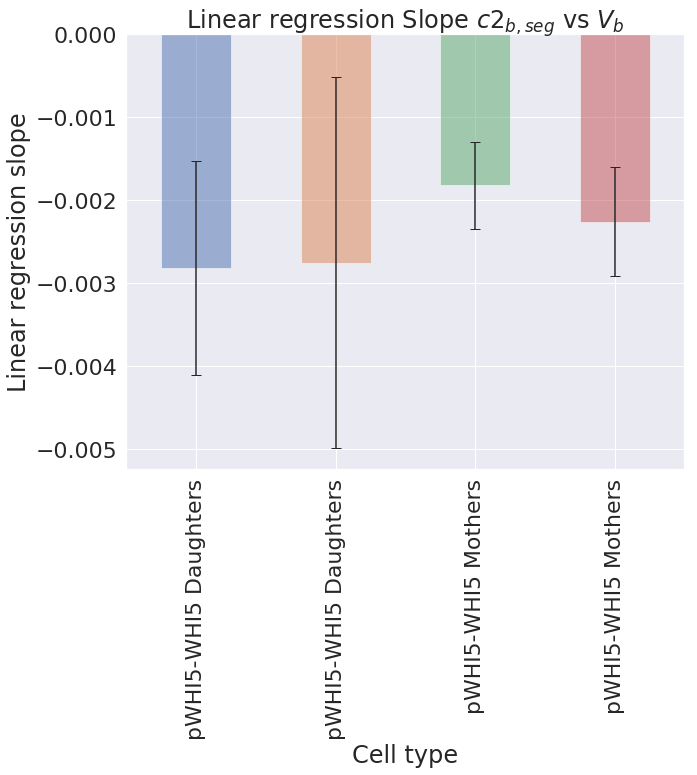

In [242]:
sns.set(font_scale=2.0)
plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
plt.title('Linear regression Slope $c2_{b,seg}$ vs $V_b$')
plt.xlabel('Cell type')
plt.ylabel('Linear regression slope')
fig=plot.get_figure()
fig.savefig('./plots/c1_Vb_slope_comp_pWHI5.png',bbox_inches='tight')

In [52]:
types = ['D','M']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,seg}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind in range(len(labels)):
    for ind1 in range(len(types)):
        print labels[ind], types[ind1]
        label.append(labels[ind]+' '+types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1&v2][x], df[v1&v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([z[0][0]-vals[0][-1], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['PCC', 'label'])
temp1['PCC'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg}$
pGAL1-WHI5 12/20 D
0.043222057262748484 0.4843067193201907
pGAL1-WHI5 12/20 M


/home/felix/anaconda2/lib/python2.7/site-packages/scikits/bootstrap/bootstrap.py:202: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  warnings.warn("Some values used top 10 low/high samples; results may be unstable.", InstabilityWarning)


-0.0965365968594206 0.1395974024353305
pWHI5-WHI5 4/17 D
0.36873609519243056 0.584642642283496
pWHI5-WHI5 4/17 M
0.05317919608897731 0.3024219107365295
['pGAL1-WHI5 12/20 D', 'pGAL1-WHI5 12/20 M', 'pWHI5-WHI5 4/17 D', 'pWHI5-WHI5 4/17 M']


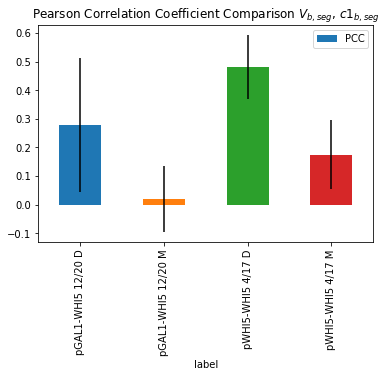

In [53]:
plot = temp1.plot(x='label',y='PCC',kind='bar',yerr=zip(*vals[1]))
plt.title('Pearson Correlation Coefficient Comparison $V_{b,seg}$, $c1_{b,seg}$')
fig = plot.get_figure()
fig.savefig('./plots/PCC_comparison_c2b_vb_V1.png',bbox_inches='tight')

In [78]:
types = ['D','M']
labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
x, y = '$V_{b,seg}$', '$c2_{b,seg}$'
print x,y
vals = [[],[]]
label = []
for ind in range(len(labels)):
    for ind1 in range(len(types)):
        print labels[ind], types[ind1]
        label.append(labels[ind]+' '+types[ind1])
        v1=df.type==types[ind1]
        v2=df.label==labels[ind]
        z = boot.ci((df[v1&v2][x], df[v1&v2][y]), scipy.stats.pearsonr)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([z[0][0]-vals[0][-1], z[1][0]-vals[0][-1]])
        print z[0][0], z[1][0]
temp1 = pd.DataFrame(columns = ['PCC', 'label'])
temp1['PCC'] = vals[0]
temp1['label'] = label
print label

$V_{b,seg}$ $c2_{b,seg}$
pGAL1-WHI5 11/14 D
0.4168912236481771 0.648780072459226
pGAL1-WHI5 11/14 M
-0.037059759788360014 0.22592885757856224
pWHI5-WHI5 12/07 D
0.44068906921341316 0.6170291005688443
pWHI5-WHI5 12/07 M
-0.14463839995562813 0.05838602808323705
['pGAL1-WHI5 11/14 D', 'pGAL1-WHI5 11/14 M', 'pWHI5-WHI5 12/07 D', 'pWHI5-WHI5 12/07 M']


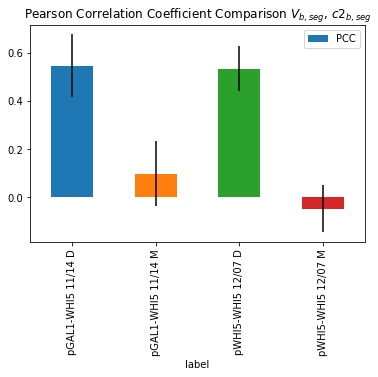

In [79]:
plot = temp1.plot(x='label',y='PCC',kind='bar',yerr=zip(*vals[1]))
plt.title('Pearson Correlation Coefficient Comparison $V_{b,seg}$, $c2_{b,seg}$')
fig = plot.get_figure()
fig.savefig('./plots/PCC_comparison_c2b_vb.png',bbox_inches='tight')

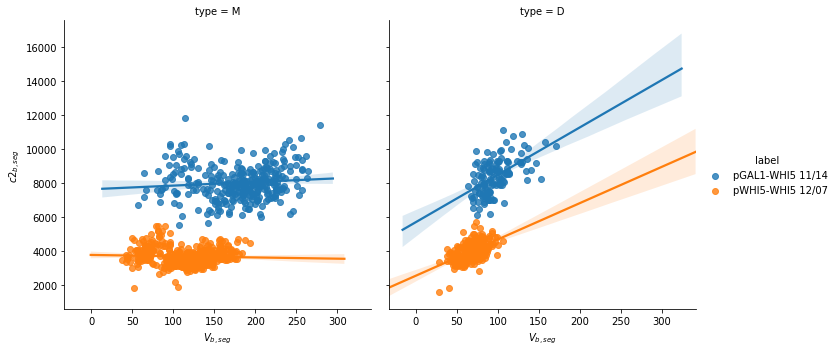

In [50]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg}$', data=df,hue='label', col="type")
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/c2b_Vb.png')
plt.show()

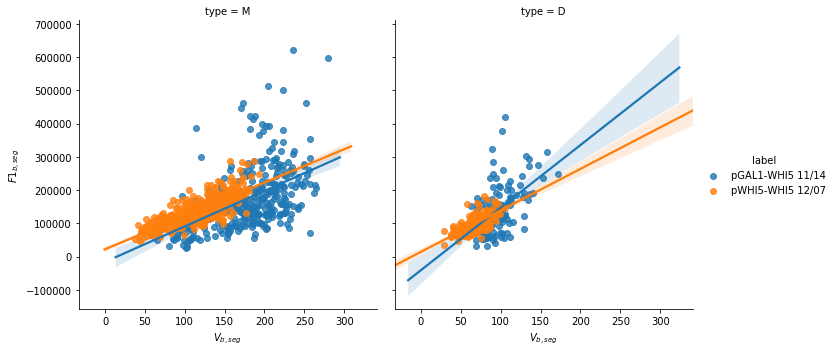

In [51]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$F1_{b,seg}$', data=df,hue='label', col="type")
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/F1b_Vb.png')

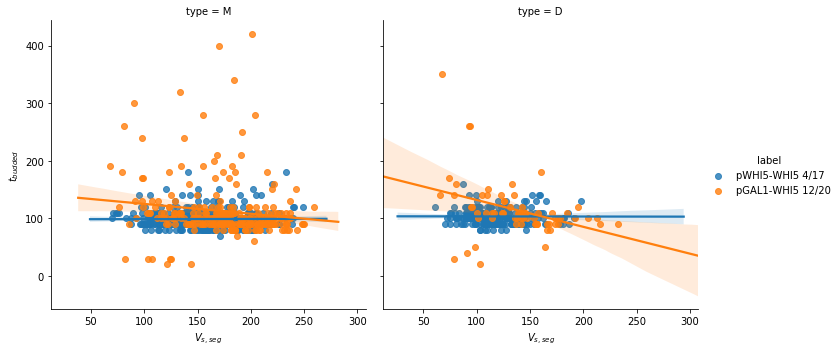

In [43]:
sns_plot=sns.lmplot(x='$V_{s,seg}$',y='$t_{budded}$', data=df,hue='label', col="type",fit_reg=True)
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tbud_Vs.png')

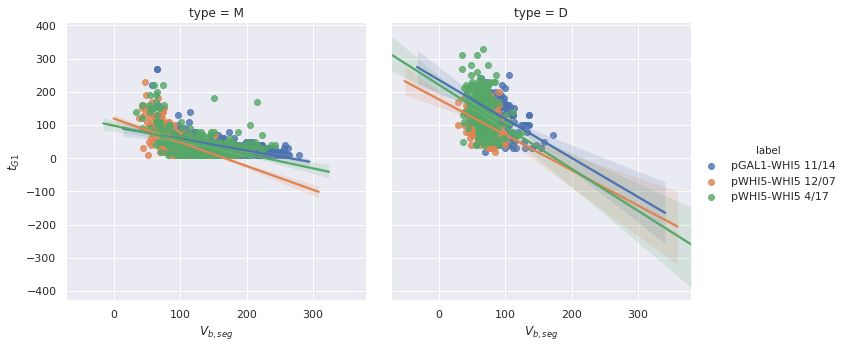

In [18]:
sns_plot=sns.lmplot(x='$V_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type")
plt.show()
# sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tG1_Vb.png')

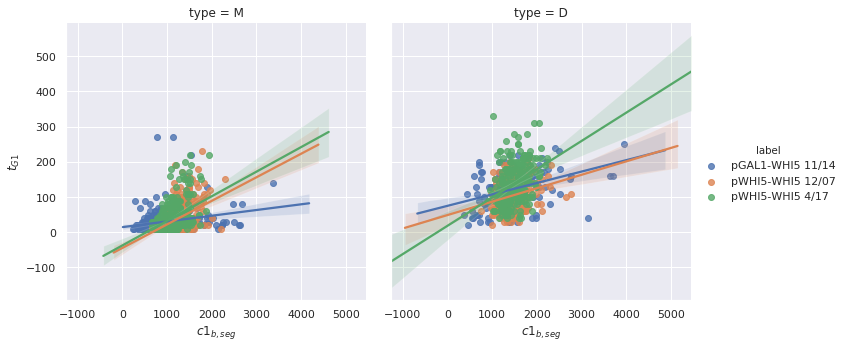

In [17]:
sns_plot=sns.lmplot(x='$c1_{b,seg}$',y='$t_{G1}$', data=df,hue='label', col="type",fit_reg=True)
plt.show()
sns_plot.savefig('/home/felix/Dropbox/meetings/181217_murraylab_meeting/tG1_c1b.png')

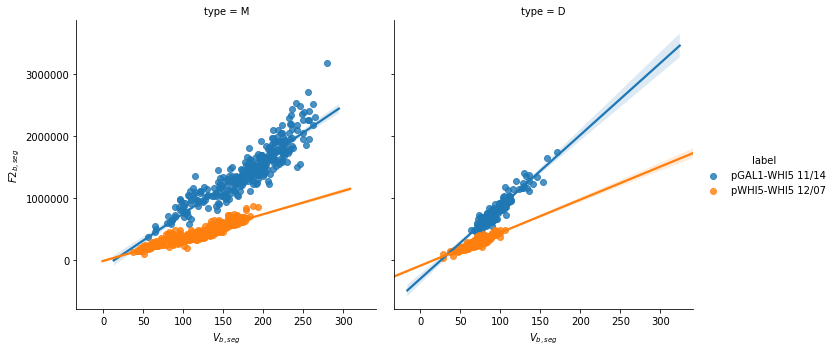

In [33]:
sns.lmplot(x='$V_{b,seg}$',y='$F2_{b,seg}$', data=df,hue='label', col="type")
plt.show()

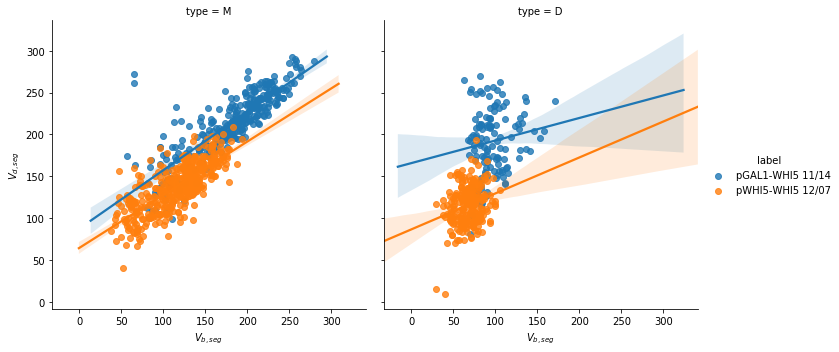

In [35]:
sns.lmplot(x='$V_{b,seg}$',y='$V_{d,seg}$', data=df,hue='label', col="type")
plt.show()

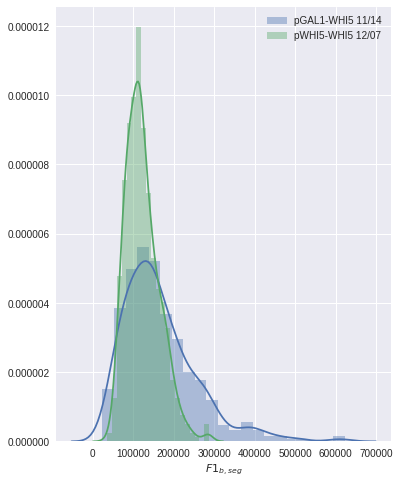

In [102]:
fig=plt.figure(figsize=[6,8])
sns.distplot(df0['$F1_{b,seg}$'], label='pGAL1-WHI5 11/14')
sns.distplot(df0['$F1_{b,seg}$'], label='pWHI5-WHI5 12/07')
plt.legend()
plt.show()

In [114]:
i0=0
sns.lmplot(x='$V_{b,seg}$',y='$c1_{div,zproj}$', data=dfs[i0][dfs[i0]['type']=='D'],label=labels[i0])
plt.show()

TypeError: lmplot() got an unexpected keyword argument 'label'

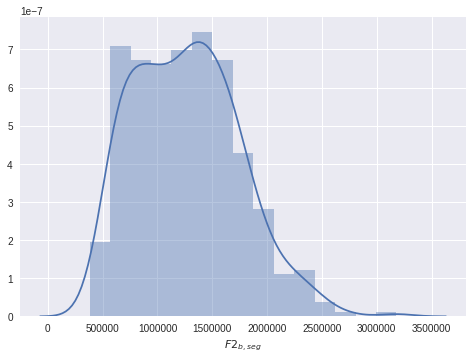

In [57]:
sns.distplot(df['$F2_{b,seg}$'])
plt.show()

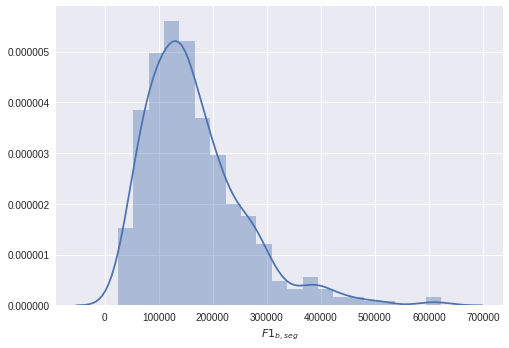

In [58]:
sns.distplot(df['$F1_{b,seg}$'])
plt.show()

In [63]:
np.mean(df['$F1_{b,seg}$'])

165699.7160795826

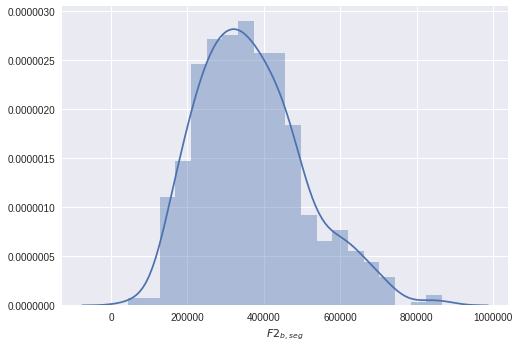

In [43]:
sns.distplot(df['$F2_{b,seg}$'])
plt.show()

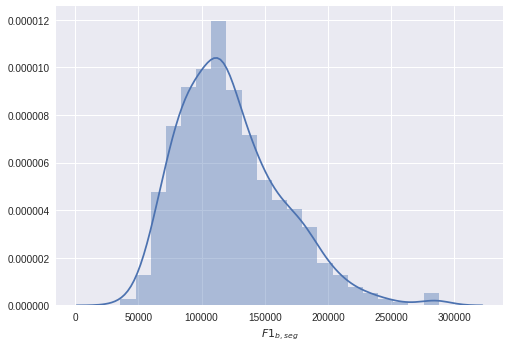

In [42]:
sns.distplot(df['$F1_{b,seg}$'])
plt.show()

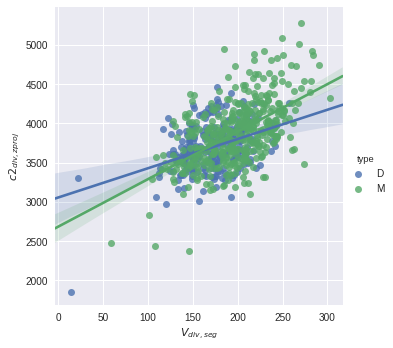

In [9]:
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,zproj}$', data=df,hue='type')
plt.show()

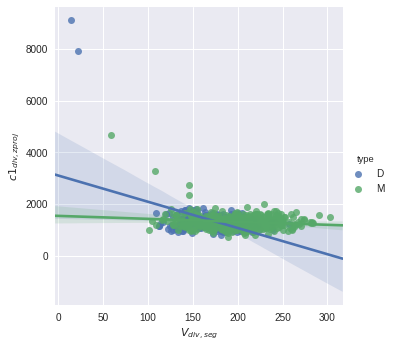

In [10]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,zproj}$', data=df,hue='type')
plt.show()

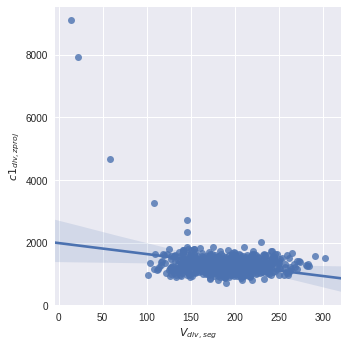

In [11]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,zproj}$', data=df)
plt.show()

In [12]:
print scipy.stats.pearsonr(df['$V_{div,seg}$'], df['$c2_{div,zproj}$'])
print scipy.stats.pearsonr(df['$V_{div,seg}$'], df['$c1_{div,zproj}$'])

(0.54838946401661959, 3.0479808186876449e-53)
(-0.27582236560745893, 5.0512314251053162e-13)


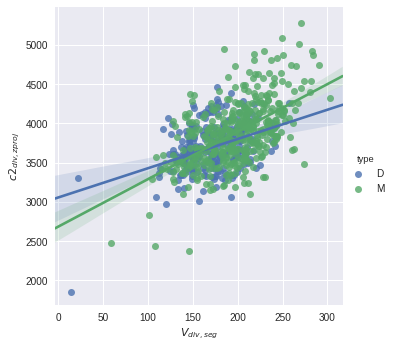

In [13]:
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,zproj}$', data=df,hue='type')
plt.show()

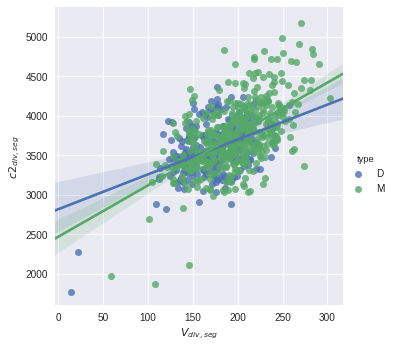

In [14]:
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,seg}$', data=df,hue='type')
plt.show()

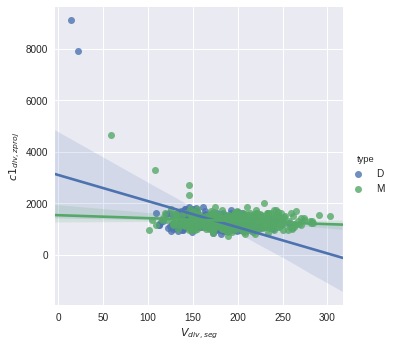

In [15]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,zproj}$', data=df,hue='type')
plt.show()

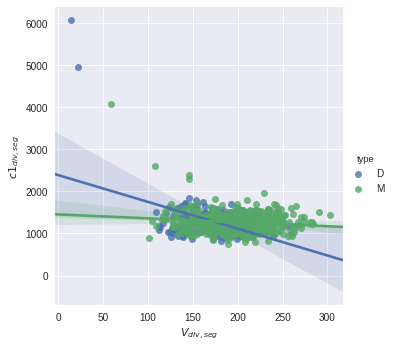

In [16]:
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,seg}$', data=df,hue='type')
plt.show()

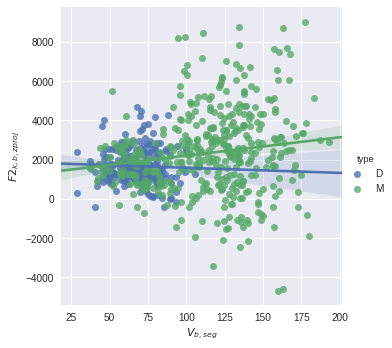

In [17]:
sns.lmplot(x='$V_{b,seg}$',y='$F2_{k,b,zproj}$', data=df,hue='type')
plt.show()

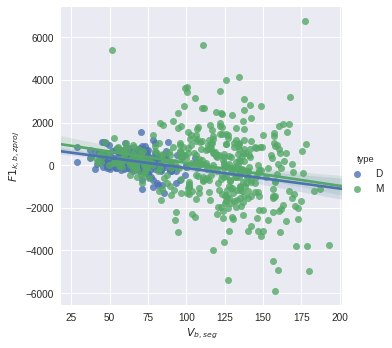

In [18]:
sns.lmplot(x='$V_{b,seg}$',y='$F1_{k,b,zproj}$', data=df,hue='type')
plt.show()

In [35]:
print scipy.stats.pearsonr(df['$c2_{b,seg}$'], df['$V_{b,seg}$'])
print scipy.stats.pearsonr(df['$c1_{b,seg}$'], df['$V_{b,seg}$'])

(-0.12036508552030595, 0.0019199097733277638)
(-0.48069457237182239, 1.416224754170082e-39)


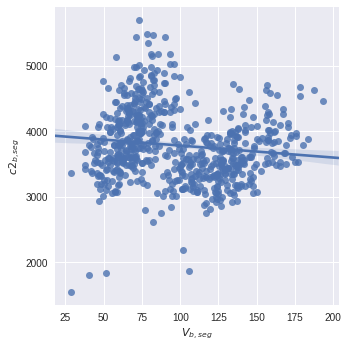

In [32]:
sns.lmplot(x='$V_{b,seg}$',y='$c2_{b,seg}$', data=df,hue='type')
plt.show()

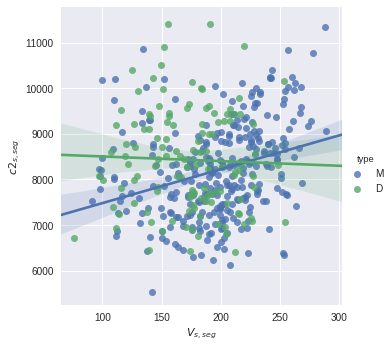

In [62]:
sns.lmplot(x='$V_{s,seg}$',y='$c2_{s,seg}$', data=df,hue='type')
plt.show()

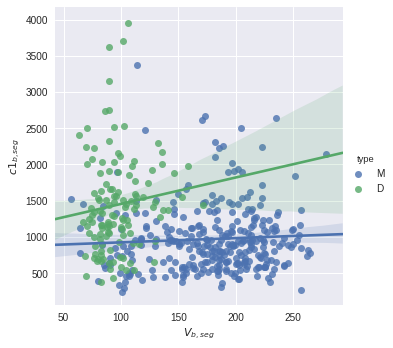

In [61]:
sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df,hue='type')
plt.show()

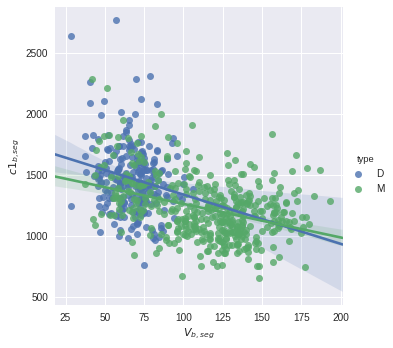

In [34]:
sns.lmplot(x='$V_{b,seg}$',y='$c1_{b,seg}$', data=df,hue='type')
plt.show()

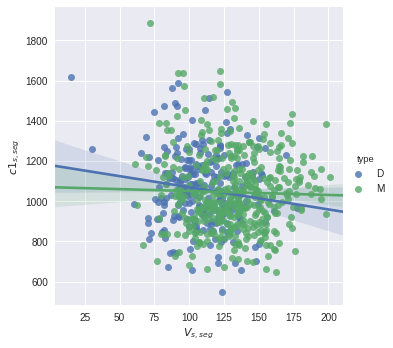

In [23]:
sns.lmplot(x='$V_{s,seg}$',y='$c1_{s,seg}$', data=df,hue='type')
plt.show()

<Figure size 432x432 with 0 Axes>

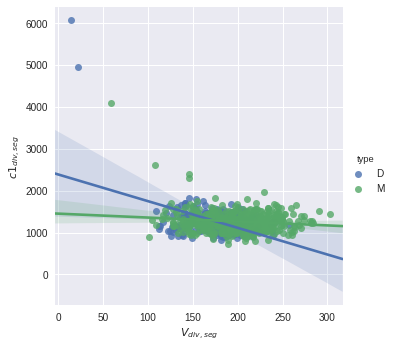

In [24]:
fig=plt.figure(figsize=[6,6])
sns.lmplot(x='$V_{div,seg}$',y='$c1_{div,seg}$', data=df,hue='type')
plt.show()
# fig.savefig('./expt_ids'+expt_id+'C2_Vb.png')
del fig

<Figure size 432x432 with 0 Axes>

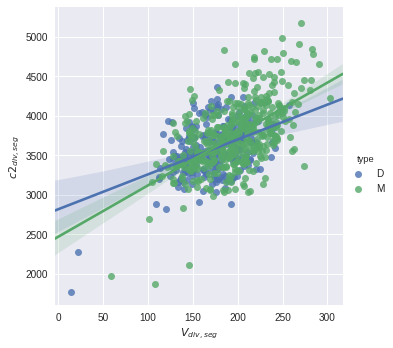

In [25]:
fig=plt.figure(figsize=[6,6])
sns.lmplot(x='$V_{div,seg}$',y='$c2_{div,seg}$', data=df,hue='type')
plt.show()
# fig.savefig('./expt_ids'+expt_id+'C2_Vb.png')
del fig

In [26]:
print scipy.stats.pearsonr(df['$V_{b,seg}$'], df['$c2_{b,seg}$'])
print scipy.stats.pearsonr(df['$V_{b,seg}$'], df['$c1_{b,seg}$'])

(-0.12036508552030595, 0.0019199097733277638)
(-0.48069457237182239, 1.416224754170082e-39)


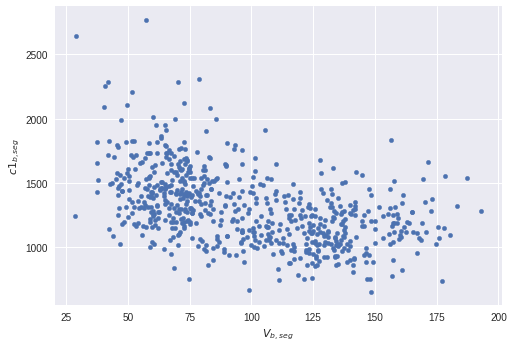

In [27]:
df.plot(kind='scatter',x='$V_{b,seg}$',y='$c1_{b,seg}$')
plt.show()

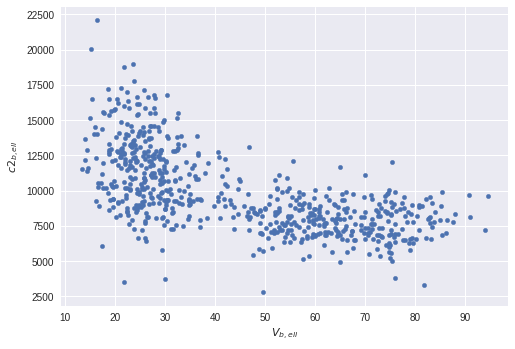

In [28]:
df.plot(kind='scatter',x='$V_{b,ell}$',y='$c2_{b,ell}$')
plt.show()

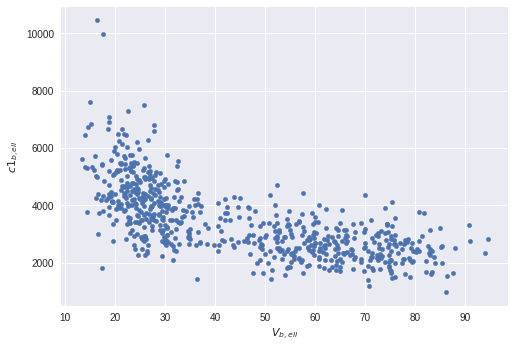

In [29]:
df.plot(kind='scatter',x='$V_{b,ell}$',y='$c1_{b,ell}$')
plt.show()

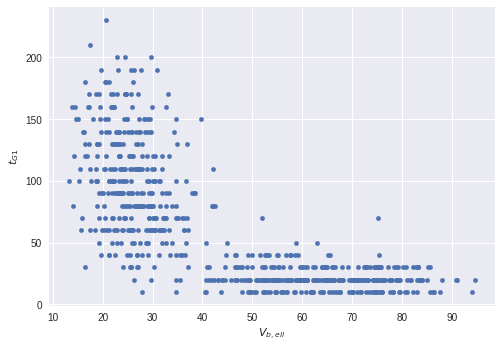

In [30]:
df.plot(kind='scatter',x='$V_{b,ell}$',y='$t_{G1}$')
plt.show()